In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
data_path = 'large_sentiment_analysis_dataset.csv'
data = pd.read_csv(data_path)

In [3]:
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     10000 non-null  object
 1   Sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [4]:
# checking for missing values
data.dropna(inplace=True)

In [5]:
# splitting data into training and testing sets
x = data['Review']
y = data['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# vectorization using TF-IDF
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [7]:
# model training
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [8]:
# predictions
y_pred = model.predict(x_test_tfidf)

In [9]:
# evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       658
     Neutral       1.00      1.00      1.00       639
    Positive       1.00      1.00      1.00       703

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



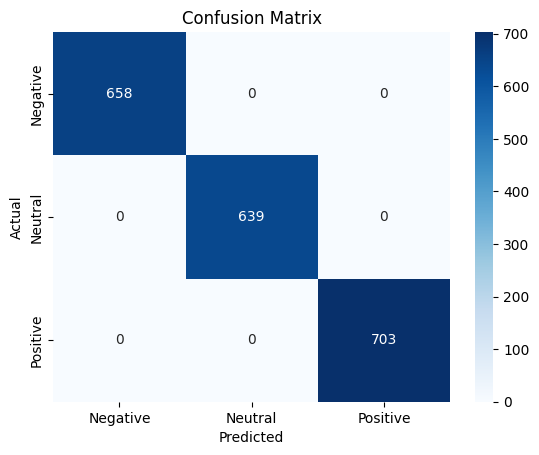

In [10]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Function to predict sentiment of a new review
def predict_sentiment(review):
    # Preprocess the review (similar to how the data was preprocessed)
    review_tfidf = vectorizer.transform([review])  # Transform the new review using the same vectorizer
    prediction = model.predict(review_tfidf)  # Predict the sentiment
    return prediction[0]  # Return the predicted sentiment (Negative, Neutral, or Positive)

# Test with some custom reviews
reviews_to_test = [
    "This product is amazing! I'm so happy with my purchase.",
    "The movie was terrible, I regret watching it.",
    "It was okay, neither good nor bad.",
    "Absolutely love it! Will definitely recommend to others."
]

for review in reviews_to_test:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print("=" * 50)


Review: This product is amazing! I'm so happy with my purchase.
Predicted Sentiment: Positive
Review: The movie was terrible, I regret watching it.
Predicted Sentiment: Neutral
Review: It was okay, neither good nor bad.
Predicted Sentiment: Neutral
Review: Absolutely love it! Will definitely recommend to others.
Predicted Sentiment: Positive
